# Colorectal CODEX data

In [1]:
import os
import sys
sys.path.append("../")
device = "cuda"

In [2]:
import scanpy as sc
import squidpy as sq
import pandas as pd
from tqdm.notebook import tqdm
import scipy as sp
import numpy as np
from sksurv.nonparametric import kaplan_meier_estimator

C:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\dask\dataframe\_pyarrow_compat.py:15: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(


In [3]:
import torch

In [4]:
import steamboat as sf
import steamboat.tools

In [5]:
import pickle as pkl

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import matplotlib
plt.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['mathtext.fontset'] = 'dejavuserif'
matplotlib.rcParams['font.family'] = 'arial'

In [8]:
import importlib
importlib.reload(steamboat.tools)

<module 'steamboat.tools' from 'G:\\Projects\\Steamboat\\examples\\..\\steamboat\\tools.py'>

In [9]:
data_path = "E:/codex/"
# fig_path = "C:/Users/lshh/OneDrive/Publications/Steamboat/pub/fig-codex-elements/"
# pltkw = dict(bbox_inches='tight', transparent=True)

## Process dataset

You can download the dataset [here](https://data.mendeley.com/datasets/mpjzbtfgfr/1)

In [10]:
patient_info = pd.read_excel(data_path + "mmc2.xlsx", sheet_name=0, skipfooter=5)

C:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [11]:
data = pd.read_csv("E:/codex/CRC_clusters_neighborhoods_markers.csv", index_col=0)
features = [
       'CD44 - stroma:Cyc_2_ch_2', 'FOXP3 - regulatory T cells:Cyc_2_ch_3',
       'CD8 - cytotoxic T cells:Cyc_3_ch_2',
       'p53 - tumor suppressor:Cyc_3_ch_3',
       'GATA3 - Th2 helper T cells:Cyc_3_ch_4',
       'CD45 - hematopoietic cells:Cyc_4_ch_2', 'T-bet - Th1 cells:Cyc_4_ch_3',
       'beta-catenin - Wnt signaling:Cyc_4_ch_4', 'HLA-DR - MHC-II:Cyc_5_ch_2',
       'PD-L1 - checkpoint:Cyc_5_ch_3', 'Ki67 - proliferation:Cyc_5_ch_4',
       'CD45RA - naive T cells:Cyc_6_ch_2', 'CD4 - T helper cells:Cyc_6_ch_3',
       'CD21 - DCs:Cyc_6_ch_4', 'MUC-1 - epithelia:Cyc_7_ch_2',
       'CD30 - costimulator:Cyc_7_ch_3', 'CD2 - T cells:Cyc_7_ch_4',
       'Vimentin - cytoplasm:Cyc_8_ch_2', 'CD20 - B cells:Cyc_8_ch_3',
       'LAG-3 - checkpoint:Cyc_8_ch_4', 'Na-K-ATPase - membranes:Cyc_9_ch_2',
       'CD5 - T cells:Cyc_9_ch_3', 'IDO-1 - metabolism:Cyc_9_ch_4',
       'Cytokeratin - epithelia:Cyc_10_ch_2',
       'CD11b - macrophages:Cyc_10_ch_3', 'CD56 - NK cells:Cyc_10_ch_4',
       'aSMA - smooth muscle:Cyc_11_ch_2', 'BCL-2 - apoptosis:Cyc_11_ch_3',
       'CD25 - IL-2 Ra:Cyc_11_ch_4', 'CD11c - DCs:Cyc_12_ch_3',
       'PD-1 - checkpoint:Cyc_12_ch_4',
       'Granzyme B - cytotoxicity:Cyc_13_ch_2', 'EGFR - signaling:Cyc_13_ch_3',
       'VISTA - costimulator:Cyc_13_ch_4', 'CD15 - granulocytes:Cyc_14_ch_2',
       'ICOS - costimulator:Cyc_14_ch_4',
       'Synaptophysin - neuroendocrine:Cyc_15_ch_3',
       'GFAP - nerves:Cyc_16_ch_2', 'CD7 - T cells:Cyc_16_ch_3',
       'CD3 - T cells:Cyc_16_ch_4',
       'Chromogranin A - neuroendocrine:Cyc_17_ch_2',
       'CD163 - macrophages:Cyc_17_ch_3', 'CD45RO - memory cells:Cyc_18_ch_3',
       'CD68 - macrophages:Cyc_18_ch_4', 'CD31 - vasculature:Cyc_19_ch_3',
       'Podoplanin - lymphatics:Cyc_19_ch_4', 'CD34 - vasculature:Cyc_20_ch_3',
       'CD38 - multifunctional:Cyc_20_ch_4',
       'CD138 - plasma cells:Cyc_21_ch_3', 
       'CDX2 - intestinal epithelia:Cyc_2_ch_4',
       'Collagen IV - bas. memb.:Cyc_12_ch_2',
       'CD194 - CCR4 chemokine R:Cyc_14_ch_3',
       'MMP9 - matrix metalloproteinase:Cyc_15_ch_2',
       'CD71 - transferrin R:Cyc_15_ch_4', 'CD57 - NK cells:Cyc_17_ch_4',
       'MMP12 - matrix metalloproteinase:Cyc_21_ch_4']

metadata = data.drop(features, axis=1)
data = data[features]

In [12]:
p2g_dict = {'CD44': 'CD44',
 'FOXP3': 'FOXP3',
 'CD8': 'CD8A',
 'p53': 'TP53',
 'GATA3': 'GATA3',
 'CD45': 'PTPRC',
 'T-bet': 'TBX21',
 'beta-catenin': 'CTNNB1',
 'HLA-DR': 'HLA-DRA',
 'PD-L1': 'CD274',
 'Ki67': 'MKI67',
 'CD45RA': 'PTPRC',
 'CD4': 'CD4',
 'CD21': 'CR2',
 'MUC-1': 'MUC1',
 'CD30': 'TNFRSF8',
 'CD2': 'CD2',
 'Vimentin': 'VIM',
 'CD20': 'MS4A1',
 'LAG-3': 'LAG3' ,
 'Na-K-ATPase': 'ATP1A1',
 'CD5': 'CD5',
 'IDO-1': 'IDO1',
 'Cytokeratin': 'KRT20',
 'CD11b': 'ITGAM',
 'CD56': 'NCAM',
 'aSMA': 'ACTA2',
 'BCL-2': 'BCL2',
 'CD25': 'IL2RA',
 'CD11c': 'ITGAX',
 'PD-1': 'PDCD1',
 'Granzyme B': 'GZMB',
 'EGFR': 'EGFR',
 'VISTA': 'VSIR',
 'CD15': 'FUT4',
 'ICOS': 'ICOS',
 'Synaptophysin': 'SYP',
 'GFAP': 'GFAP',
 'CD7': 'CD7',
 'CD3': 'CD3D',
 'Chromogranin A': 'CHGA',
 'CD163': 'CD163',
 'CD45RO': 'PTPRC',
 'CD68': 'CD68',
 'CD31': 'PECAM1',
 'Podoplanin': 'PDPN',
 'CD34': 'CD34',
 'CD38': 'CD38',
 'CD138': 'SDC1',
 'CDX2': 'CDX2',
 'Collagen IV': 'COL4A1',
 'CD194': 'CCR4',
 'MMP9': 'MMP9',
 'CD71': 'TFRC',
 'CD57': 'B3GAT1',
 'MMP12': 'MMP12'}

In [13]:
def feature_map(s):
    if ':' in s:
        s = s.split(':')[0]
    if ' - ' in s:
        s = s.split(' - ')[0]
    return s
short_features = list(map(feature_map, features))
# short_features

In [14]:
metadata.head().style

,CellID,ClusterID,EventID,File Name,Region,TMA_AB,TMA_12,Index in File,groups,patients,spots,cell_id:cell_id,tile_nr:tile_nr,X:X,Y:Y,X_withinTile:X_withinTile,Y_withinTile:Y_withinTile,Z:Z,size:size,HOECHST1:Cyc_1_ch_1,DRAQ5:Cyc_23_ch_4,Profile_Homogeneity:Fiter1,ClusterSize,ClusterName,neighborhood10,CD4+ICOS+,CD4+Ki67+,CD4+PD-1+,CD68+CD163+ICOS+,CD68+CD163+Ki67+,CD68+CD163+PD-1+,CD68+ICOS+,CD68+Ki67+,CD68+PD-1+,CD8+ICOS+,CD8+Ki67+,CD8+PD-1+,Treg-ICOS+,Treg-Ki67+,Treg-PD-1+,neighborhood number final,neighborhood name
0,0,10668,0,reg001_A,reg001,A,1,0,1,1,1_A,3,1,77,589,77,589,10,10120,472.335785,2011.402222,3.170372,22144,granulocytes,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.000000,Granulocyte enriched
1,1,10668,4,reg001_A,reg001,A,1,4,1,1,1_A,9,1,106,826,106,826,10,861,761.088501,3221.254883,5.373874,22144,granulocytes,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.000000,Macrophage enriched
2,2,10668,5,reg001_A,reg001,A,1,5,1,1,1_A,10,1,107,545,107,545,10,6206,1353.695679,5228.323730,5.239202,22144,granulocytes,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.000000,Immune-infiltrated stroma
3,3,10668,6,reg001_A,reg001,A,1,6,1,1,1_A,13,1,98,564,98,564,10,6320,844.661743,1259.016846,4.616237,22144,granulocytes,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.000000,Immune-infiltrated stroma
4,4,10668,30,reg001_A,reg001,A,1,30,1,1,1_A,65,1,217,329,217,329,10,1591,1746.380859,8041.375000,5.331494,22144,granulocytes,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.000000,Macrophage enriched


In [15]:
all_adata = sc.AnnData(data, obs=metadata)
all_adata.var_names = short_features
all_adata.obsm['spatial'] = all_adata.obs[['X:X', 'Y:Y']].to_numpy()

adatas = []
for i in all_adata.obs['File Name'].unique():
    adatas.append(all_adata[all_adata.obs['File Name'] == i].copy())
    adatas[-1].obs['global'] = 0
adatas = sf.prep_adatas(adatas)
dataset = sf.make_dataset(adatas, sparse_graph=True, regional_obs=['global'])

C:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\anndata\_core\anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


  0%|          | 0/140 [00:00<?, ?it/s]

Using ['global'] as regional annotations.


  0%|          | 0/140 [00:00<?, ?it/s]

In [16]:
pop_cell_types = all_adata.obs["ClusterName"].value_counts()[all_adata.obs["ClusterName"].value_counts() > all_adata.shape[0] * .005].index.tolist()
pop_cell_types

['tumor cells',
 'CD68+CD163+ macrophages',
 'smooth muscle',
 'granulocytes',
 'stroma',
 'CD8+ T cells',
 'CD4+ T cells CD45RO+',
 'B cells',
 'vasculature',
 'plasma cells',
 'dirt',
 'undefined',
 'immune cells',
 'Tregs',
 'CD4+ T cells',
 'immune cells / vasculature',
 'CD68+ macrophages',
 'adipocytes',
 'tumor cells / immune cells',
 'CD11b+CD68+ macrophages']

## Train model

In [17]:
cuda_dataset = dataset.to('cuda')

In [19]:
sf.set_random_seed(0)
model = sf.Steamboat(short_features, n_heads=10, n_scales=3)
model = model.to(device)

# model.fit(cuda_dataset, entry_masking_rate=0.1, feature_masking_rate=0.0,
#           max_epoch=10000, 
#           loss_fun=torch.nn.MSELoss(reduction='sum'),
#           opt=torch.optim.Adam, opt_args=dict(lr=0.1), stop_eps=1e-3, report_per=200, stop_tol=200, device=device)

# torch.save(model.state_dict(), 'saved_models/crc_codex.pth')

model.load_state_dict(torch.load('../experiments/saved_models/crc_codex.pth', weights_only=True), strict=False)

_IncompatibleKeys(missing_keys=[], unexpected_keys=['spatial_gather.w_local._scale', 'spatial_gather.w_global._scale'])

In [20]:
sf.tools.calc_obs(adatas, dataset, model, get_recon=False)

  0%|          | 0/140 [00:00<?, ?it/s]

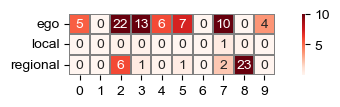

In [21]:
head_weights = sf.tools.calc_head_weights(adatas, model)
sf.tools.plot_head_weights(head_weights)

['CD20' 'CD45' 'CD163' 'p53' 'LAG-3' 'aSMA' 'Ki67' 'EGFR' 'CD194' 'CD30'
 'CD15' 'Cytokeratin' 'CD45RO' 'CD2' 'CD57' 'Collagen IV' 'Chromogranin A'
 'beta-catenin' 'CD71' 'CD7' 'BCL-2']


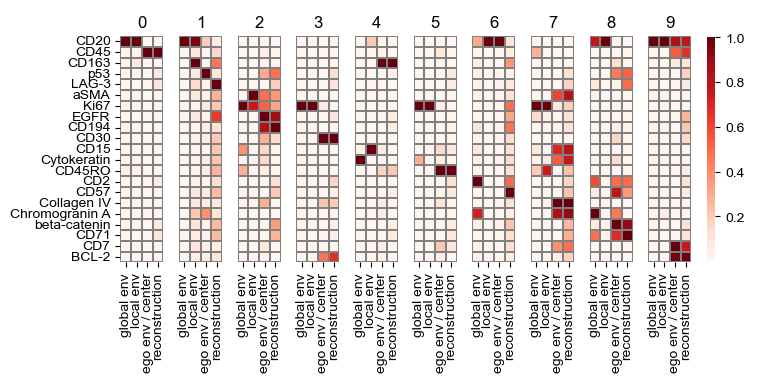

In [22]:
sf.tools.plot_all_transforms(model, top=1)

(<Figure size 300x300 with 2 Axes>, <Axes: >)

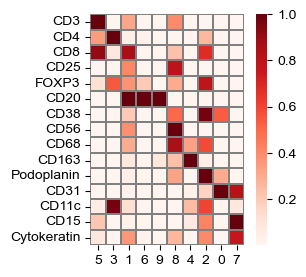

In [23]:
# T cells (CD3+)
# cytotoxic T cells (CD3+CD8+)
# T helper cells (CD3+CD4+), 
# Tregs (CD3+CD4+CD25+FOXP3+), 
# B cells (CD3-CD20+), 
# plasma cells (CD3-CD20-CD56-CD68-CD163-CD38+)
# NK cells (CD3-CD20-CD56+), 
# CD68+ macrophages (CD3-CD20-CD56-CD68+), 
# CD163 +macrophages (CD3-CD20-CD56-CD163+), 
# CD68+CD163+double-positive macrophages (CD3-CD20-CD56-CD68+CD163+), 
# lymphatics (CD3-CD20-CD56-Podoplanin+),
# vasculature (CD3-CD20-CD56-CD31+), 
# dendritic cells (CD3-CD20-CD56-CD11c+), 
# granulocytes (CD3-CD20-CD56-CD15+)

chosen_features = ['CD3', 'CD4', 'CD8', 'CD25', 'FOXP3',  # T
                   'CD20', 'CD38',  # B/Plasma
                   'CD56',  # NK
                   'CD68', 'CD163', # Macro
                   'Podoplanin', #lymphatics
                   'CD31', #vasculature
                   'CD11c', #dendritic
                   'CD15', #granulocytes
                   'Cytokeratin'
                  ]

sf.tools.plot_vq(model, chosen_features)

## Global attention interpretation

In [24]:
sample_df = pd.crosstab(all_adata.obs['File Name'], all_adata.obs['neighborhood name'])
sample_df = sample_df.div(sample_df.sum(axis=1), axis=0)
sample_df['TLS'] = sample_df['Follicle'] > 0.00

sample_os = []
for i in patient_info['OS']:
    sample_os.extend([i] * 4)
sample_df['OS'] = sample_os

sample_osc = []
for i in patient_info['OS_Censor']:
    sample_osc.extend([i] * 4)
sample_df['OS_Censor'] = sample_osc

sample_dfs = []
for i in patient_info['DFS']:
    sample_dfs.extend([i] * 4)
sample_df['DFS'] = sample_dfs

sample_df['Patient'] = [i.obs['patients'].unique().item() for i in adatas]
sample_df['Group'] = [i.obs['groups'].unique().item() for i in adatas]

sample_df['Group'] = np.array(['', 'CLR', 'DII'])[sample_df['Group'].astype(int)]
sample_df['TLS'] = np.array(['No', 'Yes'])[sample_df['TLS'].astype(int)]
sample_df.loc[sample_df['Group'] == 'DII', 'TLS'] = 'No'

CLR Yes vs No: 0.5934065934065934 0.20022301659028963
DII vs CLR-No: 0.6633597883597884 0.0037443658462830293
DII vs CLR: 0.701593137254902 3.9057054643225304e-05
CLR Yes vs No: 0.3736263736263736 0.0826997853235793
DII vs CLR-No: 0.7106481481481481 0.00018479325733404154
DII vs CLR: 0.6595179738562091 0.00113745105113063


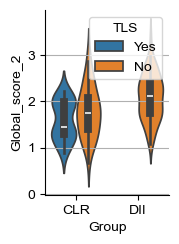

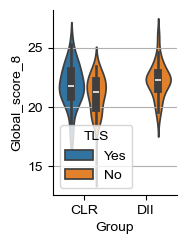

In [25]:
for i_head in [2, 8]:
    score_name = f'Global_score_{i_head}'
    sample_df[score_name] = [i.uns['global_k_0'][0, i_head] for i in adatas]
    
    g1 = (sample_df['Group'] == 'CLR') & (sample_df['TLS'] == 'No')
    g2 = (sample_df['Group'] == 'CLR') & (sample_df['TLS'] == 'Yes')
    s, p = sp.stats.mannwhitneyu(sample_df.loc[g1, score_name], 
                                 sample_df.loc[g2, score_name])
    print('CLR Yes vs No:', s / g1.sum() / g2.sum(), p)
    
    g1 = (sample_df['Group'] == 'DII')
    g2 = (sample_df['Group'] == 'CLR') & (sample_df['TLS'] == 'No')
    s, p = sp.stats.mannwhitneyu(sample_df.loc[g1, score_name], 
                                 sample_df.loc[g2, score_name])
    print('DII vs CLR-No:', s / g1.sum() / g2.sum(), p)
    
    g1 = (sample_df['Group'] == 'DII')
    g2 = (sample_df['Group'] == 'CLR')
    s, p = sp.stats.mannwhitneyu(sample_df.loc[g1, score_name], 
                                 sample_df.loc[g2, score_name])
    print('DII vs CLR:', s / g1.sum() / g2.sum(), p)
    
    fig, ax = plt.subplots(figsize=(1.6, 2.4))
    sns.violinplot(sample_df, x='Group', hue='TLS', y=score_name, ax=ax, legend="brief")
    plt.ylabel(f'Global_score_{i_head}')
    ax.grid(axis='y')
    # ax.set_ylim([-49, 180])
    for pos in ['right', 'top']:
        ax.spines[pos].set_visible(False)

C:\Users\lshh\AppData\Local\Temp\ipykernel_67648\3390957469.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
C:\Users\lshh\AppData\Local\Temp\ipykernel_67648\3390957469.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


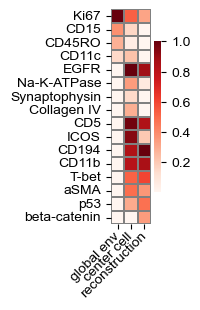

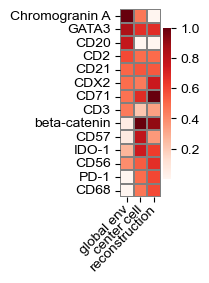

In [26]:
def plot_global_transform(model, d, 
                   top: int = 3, reorder: bool = False, 
                   figsize: str | tuple[float, float] = 'auto'):
    
    q = model.spatial_gather.q.weight[d, :].detach().cpu().numpy()
    k = model.spatial_gather.k_regionals[0].weight[d, :].detach().cpu().numpy()
    v = model.spatial_gather.v.weight[:, d].detach().cpu().numpy()
    
    if top > 0:
        rank_q = np.argsort(-q)[:top]
        rank_k = np.argsort(-k)[:top]
        rank_v = np.argsort(-v)[:top]
        feature_mask = {}
        for j in rank_k:
            feature_mask[j] = None
        for j in rank_q:
            feature_mask[j] = None
        for j in rank_v:
            feature_mask[j] = None
        feature_mask = list(feature_mask.keys())
        chosen_features = np.array(model.features)[feature_mask]
    else:
        feature_mask = list(range(len(model.features)))
        chosen_features = np.array(model.features)

    if figsize == 'auto':
        figsize = (.65, len(chosen_features) * 0.15 + .75)
    # print(figsize)
    fig, ax = plt.subplots(figsize=figsize)
    common_params = {'linewidths': .05, 'linecolor': 'gray', 'yticklabels': chosen_features, 
                     'cmap': 'Reds'}

    to_plot = np.vstack((k[feature_mask],
                         q[feature_mask],
                         v[feature_mask])).T
    true_vmax = to_plot.max(axis=0)
    # print(true_vmax)
    to_plot /= true_vmax

    sns.heatmap(to_plot, xticklabels=['global env', 'center cell', 'reconstruction'], square=True, ax=ax, **common_params)
    ax.set_xticklabels(['global env',  'center cell', 'reconstruction'], rotation=45, ha='right', va='center', rotation_mode='anchor')
    # ax.set_xticklabels(plot_axes[i].get_xticklabels(), rotation=0)
    # ax.get_yaxis().set_visible(False)

    plt.tight_layout()

plot_global_transform(model, 2, top=8)
plot_global_transform(model, 8, top=8)

## Survival analysis

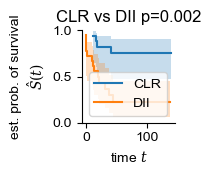

In [27]:
def summarize_samples(df, entity, keys):
    res = {key: [] for key, _ in keys}
    res[entity] = []
    for i in df[entity].unique():
        res[entity].append(i)
        for (key, how) in keys:
            # print(df.loc[df[entity] == i, key])
            if how == 'mean':
                res[key].append(df.loc[df[entity] == i, key].mean())
            elif how == 'median':
                res[key].append(df.loc[df[entity] == i, key].median())
            elif how == 'item':
                res[key].append(df.loc[df[entity] == i, key].unique().item())
    return pd.DataFrame(res)

patient_df = summarize_samples(sample_df, 'Patient', [('OS', 'item'), ('OS_Censor', 'item'), ('Group', 'item')])
patient_df['OS_Censor'] = patient_df['OS_Censor'].astype(bool)
fig, ax = plt.subplots(figsize=(1.2, 1.2))

for group in ("CLR", "DII"):
    mask = patient_df["Group"] == group
    time_survival, survival_prob, conf_int = kaplan_meier_estimator(
        patient_df["OS_Censor"][mask], 
        patient_df["OS"][mask], 
        conf_type="log-log"
    )

    ax.step(time_survival, survival_prob, where="post", label=f"{group}")
    ax.fill_between(time_survival, conf_int[0], conf_int[1], alpha=0.25, step="post")

import sksurv.compare
y = np.array([(i, j) for i, j in zip(patient_df['OS_Censor'], patient_df["OS"])], dtype=[('OS_Censor', '?'), ('Survival_in_months', '<f8')])
chi2, pval = sksurv.compare.compare_survival(y, patient_df["Group"], return_stats=False)

ax.set_title(f'CLR vs DII p={pval:.3f}')
ax.set_ylim(0, 1)
ax.set_ylabel("est. prob. of survival\n$\hat{S}(t)$")
ax.set_xlabel("time $t$")
ax.legend(loc="best")
ax.spines[['right', 'top']].set_visible(False)

2 0.03900862612646816
7 0.11923579092332769
8 0.025214997228824008


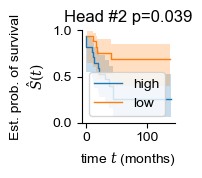

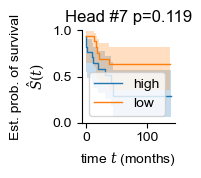

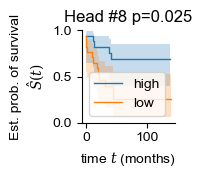

In [29]:
regional = []
for i in range(len(adatas)):
    regional.append(np.mean(adatas[i].obsm['global_attn_0'], axis=0))

for i in [2, 7, 8]:
    sample_df['head_weight'] = np.vstack(regional)[:, i]
    patient_df = summarize_samples(sample_df, 'Patient', [('OS', 'item'), ('OS_Censor', 'item'), ('Group', 'item'), ('head_weight', 'mean')])
    patient_df['OS_Censor'] = patient_df['OS_Censor'].astype(bool)
    patient_df['head_weight_binary'] = 'mid'
    patient_df.loc[patient_df['head_weight'] > patient_df['head_weight'].quantile(.5), 'head_weight_binary'] = 'high'
    patient_df.loc[patient_df['head_weight'] < patient_df['head_weight'].quantile(.5), 'head_weight_binary'] = 'low'
    
    patient_df = patient_df[patient_df['head_weight_binary'] != 'mid']
    
    y = np.array([(i, j) for i, j in zip(patient_df['OS_Censor'], patient_df["OS"])], dtype=[('OS_Censor', '?'), ('Survival_in_months', '<f8')])
    chi2, pval = sksurv.compare.compare_survival(y, patient_df["head_weight_binary"], return_stats=False)
    print(i, pval)
    
    fig, ax = plt.subplots(figsize=(1.2, 1.2))
    for group in ("high", "low"):
        mask = patient_df["head_weight_binary"] == group
        time_survival, survival_prob, conf_int = kaplan_meier_estimator(
            patient_df["OS_Censor"][mask], 
            patient_df["OS"][mask], 
            conf_type="log-log"
        )
    
        ax.step(time_survival, survival_prob, where="post", label=f"{group}", lw=1.)
        ax.fill_between(time_survival, conf_int[0], conf_int[1], alpha=0.25, step="post")
    
    ax.set_title(f'Head #{i} p={pval:.3f}')
    ax.set_ylim(0, 1)
    ax.set_ylabel("Est. prob. of survival\n$\hat{S}(t)$")
    ax.set_xlabel("time $t$ (months)")
    ax.legend(loc="best")
    ax.spines[['right', 'top']].set_visible(False)

(<Figure size 75x400 with 2 Axes>, <Axes: ylabel='neighborhood name'>)

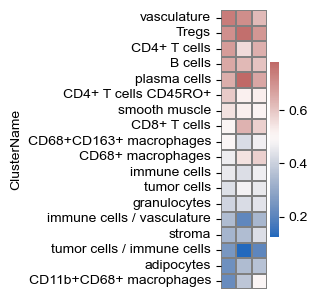

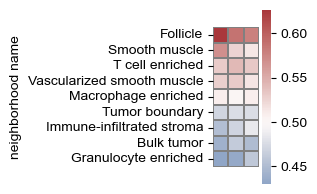

In [31]:
sf.tools.plot_cell_type_enrichment(all_adata, adatas, 2, 'ClusterName', pop_cell_types)
sf.tools.plot_cell_type_enrichment(all_adata, adatas, 2, 'neighborhood name')

(<Figure size 75x400 with 2 Axes>, <Axes: ylabel='neighborhood name'>)

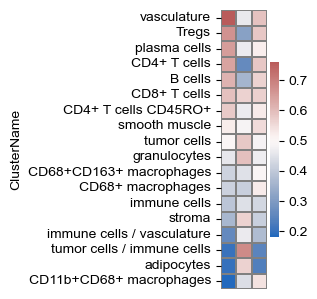

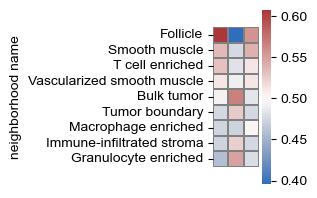

In [32]:
sf.tools.plot_cell_type_enrichment(all_adata, adatas, 8, 'ClusterName', pop_cell_types)
sf.tools.plot_cell_type_enrichment(all_adata, adatas, 8, 'neighborhood name')

## Misc visualization

C:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\squidpy\pl\_spatial_utils.py:946: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
C:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\squidpy\pl\_spatial_utils.py:946: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


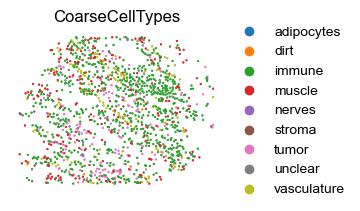

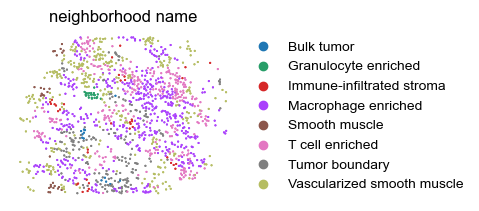

In [33]:
i_sample = 10

major_cell_type_map = {'tumor cells': 'tumor',
                         'CD68+CD163+ macrophages': 'macrophages',
                         'smooth muscle': 'muscle',
                         'granulocytes': 'granulocytes',
                         'stroma': 'stroma',
                         'CD8+ T cells': 'T cells',
                         'CD4+ T cells CD45RO+': 'T cells',
                         'B cells': 'B cells',
                         'vasculature': 'vasculature',
                         'plasma cells': 'plasma',
                         'dirt': 'dirt',
                         'undefined': 'unclear',
                         'immune cells': 'other immune',
                         'Tregs': 'T cells',
                         'CD4+ T cells': 'T cells',
                         'immune cells / vasculature': 'unclear',
                         'CD68+ macrophages': 'macrophages',
                         'adipocytes': 'adipocytes',
                         'tumor cells / immune cells': 'unclear',
                         'CD11b+CD68+ macrophages': 'macrophages',
                         'CD11b+ monocytes': 'monocytes',
                         'nerves': 'nerves',
                         'CD11c+ DCs': 'DCs',
                         'lymphatics': 'lymphatics',
                         'NK cells': 'NK cells',
                         'CD3+ T cells': 'T cells',
                         'CD68+ macrophages GzmB+': 'macrophages',
                         'CD4+ T cells GATA3+': 'T cells',
                         'CD163+ macrophages': 'macrophages'}

coarse_cell_type_map = {'tumor cells': 'tumor',
                         'CD68+CD163+ macrophages': 'immune',
                         'smooth muscle': 'muscle',
                         'granulocytes': 'immune',
                         'stroma': 'stroma',
                         'CD8+ T cells': 'immune',
                         'CD4+ T cells CD45RO+': 'immune',
                         'B cells': 'immune',
                         'vasculature': 'vasculature',
                         'plasma cells': 'immune',
                         'dirt': 'dirt',
                         'undefined': 'unclear',
                         'immune cells': 'immune',
                         'Tregs': 'immune',
                         'CD4+ T cells': 'immune',
                         'immune cells / vasculature': 'unclear',
                         'CD68+ macrophages': 'immune',
                         'adipocytes': 'adipocytes',
                         'tumor cells / immune cells': 'unclear',
                         'CD11b+CD68+ macrophages': 'immune',
                         'CD11b+ monocytes': 'immune',
                         'nerves': 'nerves',
                         'CD11c+ DCs': 'immune',
                         'lymphatics': 'immune',
                         'NK cells': 'immune',
                         'CD3+ T cells': 'immune',
                         'CD68+ macrophages GzmB+': 'immune',
                         'CD4+ T cells GATA3+': 'immune',
                         'CD163+ macrophages': 'immune'}

all_adata.obs['MajorCellTypes'] = all_adata.obs['ClusterName'].apply(major_cell_type_map.__getitem__)
all_adata.obs['CoarseCellTypes'] = all_adata.obs['ClusterName'].apply(coarse_cell_type_map.__getitem__)

neighborhood_palette = {i: j for i, j in zip(sorted(all_adata.obs['neighborhood name'].dropna().unique().tolist()), sc.pl.palettes.vega_10_scanpy)}
adatas[i_sample].uns['neighborhood name_colors'] = [neighborhood_palette[i] for i in sorted(adatas[i_sample].obs['neighborhood name'].dropna().unique().tolist())]
adatas[i_sample].obs['CoarseCellTypes'] = adatas[i_sample].obs['ClusterName'].apply(coarse_cell_type_map.__getitem__)
sq.pl.spatial_scatter(adatas[i_sample], color=['CoarseCellTypes'], shape=None, figsize=(4, 2), size=1., cmap='Reds', frameon=False)

sq.pl.spatial_scatter(adatas[i_sample], color=['neighborhood name'], shape=None, figsize=(5, 2), size=1., cmap='Reds', frameon=False)


C:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\squidpy\pl\_spatial_utils.py:946: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
C:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\squidpy\pl\_spatial_utils.py:946: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


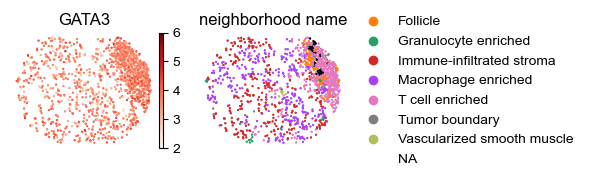

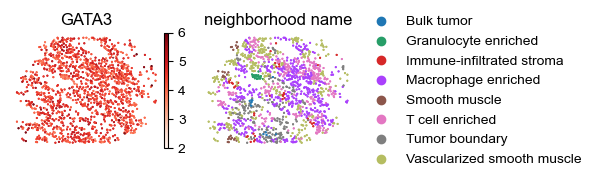

In [34]:
adatas[0].uns['neighborhood name_colors'] = [neighborhood_palette[i] for i in sorted(adatas[0].obs['neighborhood name'].dropna().unique().tolist())]
sq.pl.spatial_scatter(adatas[0], color=['GATA3', 'neighborhood name'], shape=None, figsize=(2, 1.5), size=1., cmap='Reds', frameon=False, vmin=2, vmax=6)

adatas[10].uns['neighborhood name_colors'] = [neighborhood_palette[i] for i in sorted(adatas[10].obs['neighborhood name'].dropna().unique().tolist())]
sq.pl.spatial_scatter(adatas[10], color=['GATA3', 'neighborhood name'], shape=None, figsize=(2, 1.5), size=1., cmap='Reds', frameon=False, vmin=2, vmax=6)
